In [1]:

import math, scipy
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:

df1=pd.read_excel('./UN.xlsx', sheet_name="Table 6")
df1.head(20)

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0           NaN                                                NaN        NaN   
1           NaN                                                NaN        NaN   
2           NaN                                                NaN        NaN   
3           NaN                                                NaN        NaN   
4           NaN                                                NaN        NaN   
5           NaN                                                NaN        NaN   
6           NaN                                                NaN        NaN   
7           NaN                                                NaN        NaN   
8           NaN                                                NaN        NaN   
9           NaN                                                NaN        NaN   
10          NaN                                                NaN        NaN   
11          NaN                                                NaN        NaN   
12          NaN                                                NaN        NaN   
13  Sort\norder  Major area, region, country or area of destina...      Notes   
14          NaN                                                NaN        NaN   
15            1                                              WORLD        NaN   
16            2                                  Developed regions        (b)   
17            3                                 Developing regions        (c)   
18            4                          Least developed countries        (d)   
19            5  Less developed regions excluding least develop...        NaN   

      Unnamed: 3                                         Unnamed: 4  \
0            NaN                                                NaN   
1            NaN                                                NaN   
2            NaN                                                NaN   
3            NaN                                     United Nations   
4            NaN                                Population Division   
5            NaN          Department of Economic and Social Affairs   
6            NaN                                                NaN   
7            NaN  Trends in International Migrant Stock: The 201...   
8            NaN  Table 6 - Estimated refugee stock at mid-year ...   
9            NaN                          POP/DB/MIG/Stock/Rev.2015   
10           NaN  December 2015 - Copyright © 2015 by United Nat...   
11           NaN  Suggested citation: United Nations, Department...   
12           NaN                                                NaN   
13  Country code                                   Type of data (a)   
14           NaN                                                NaN   
15           900                                                NaN   
16           901                                                NaN   
17           902                                                NaN   
18           941                                                NaN   
19           934                                                NaN   

                                          Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                                                NaN        NaN        NaN   
1                                                NaN        NaN        NaN   
2                                                NaN        NaN        NaN   
3                                                NaN        NaN        NaN   
4                                                NaN        NaN        NaN   
5                                                NaN        NaN        NaN   
6                                                NaN        NaN        NaN   
7                                                NaN        NaN        NaN   
8                                                NaN        NaN        NaN   
9                              

In [4]:
#import original messy Table 6 and delete extra rows without data
#Total means sum of female+male data
col_names = ['Sort Order','Major Area, Region, Country or Area of Destination','Notes','Country Code','Type of Data',
             '1990 Estimated refugee stock at mid-year (both sexes)',
             '1995 Estimated refugee stock at mid-year (both sexes)', '2000 Estimated refugee stock at mid-year (both sexes)'
             ,'2005 Estimated refugee stock at mid-year (both sexes)', '2010 Estimated refugee stock at mid-year (both sexes)',
             '2015 Estimated refugee stock at mid-year (both sexes)',
             '1990 Refugees as a percentage of the international migrant stock',
             '1995 Refugees as a percentage of the international migrant stock',
             '2000 Refugees as a percentage of the international migrant stock'
             ,'2005 Refugees as a percentage of the international migrant stock',
             '2010 Refugees as a percentage of the international migrant stock',
             '2015 Refugees as a percentage of the international migrant stock',
             'Annual rate of change of the refugee stock 1990-1995',
             'Annual rate of change of the refugee stock 1995-2000',
             'Annual rate of change of the refugee stock 2000-2005',
             'Annual rate of change of the refugee stock 2005-2010',
             'Annual rate of change of the refugee stock 2010-2015']
df2=pd.read_excel('UN.xlsx', sheet_name= 'Table 6',skiprows=16,header=None,usecols=list(range(1,22)),names=col_names)
df2.head()

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data 1990 Estimated refugee stock at mid-year (both sexes)  \
0          NaN                                           18836571      
1          NaN                                            2014564      
2          NaN                                           16822007      
3          NaN                                            5048391      
4          NaN                                           11773616      

  1995 Estimated refugee stock at mid-year (both sexes)  \
0                                           17853840      
1                                            3609670      
2                                           14244170      
3                                            5160131      
4                                            9084039      

  2000 Estimated refugee stock at mid-year (both sexes)  \
0                                           15827803      
1                                            2997256      
2                                           12830547      
3                                            3047488      
4                                            9783059      

  2005 Estimated refugee stock at mid-year (both sexes)  \
0                                           13276733      
1                                            2361229      
2                                           10915504      
3                                            2363782      
4                                            8551722      

   2010 Estimated refugee stock at mid-year (both sexes)  \
0                                           15370755       
1                                            2046917       
2                                           13323838       
3                                            1957884       
4                                           11365954       

   2015 Estimated refugee stock at mid-year (both sexes)  ...  \
0                                           19577474      ...   
1                                            1954224      ...   
2                                           17623250      ...   
3                                            3443582      ...   
4                                           14179668      ...   

  1995 Refugees as a percentage of the international migrant stock  \
0                                          11.103013                 
1                                           3.910511                 
2                                          20.795958                 
3                                          44.041961                 
4                                          15.999082                 

  2000 Refugees as a percentage of the international migrant stock  \
0                                           9.164736                 
1                                           2.899391                 
2                                          18.507035                 
3                                          30.221557                 
4                                           16.51313                 

  2005 Refugees as a percentage of the international migrant stock  \
0                                           6.941389                 
1                                           2.015025                 
2                                          14.733162                 
3                                           24.08243                 
4                                          13.305391                 

  2010 Refugees as a percentage 

In [5]:
#Make Table for Estimated refugee stock at mid-year

    #Drop 'Annual rate of change of the refugee stock 1990-1995',
             #'Annual rate of change of the refugee stock 1995-2000',
             #'Annual rate of change of the refugee stock 2000-2005',
             #'Annual rate of change of the refugee stock 2005-2010',
             #'Annual rate of change of the refugee stock 2010-2015']
    #Allows us to create a new table later for rate of change   
df2.drop(columns=['Annual rate of change of the refugee stock 1990-1995',
             'Annual rate of change of the refugee stock 1995-2000',
             'Annual rate of change of the refugee stock 2000-2005',
             'Annual rate of change of the refugee stock 2005-2010',
             'Annual rate of change of the refugee stock 2010-2015'],inplace=True)
df2

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                                WORLD   NaN           900   
1                                    Developed regions   (b)           901   
2                                   Developing regions   (c)           902   
3                            Least developed countries   (d)           941   
4    Less developed regions excluding least develop...   NaN           934   
..                                                 ...   ...           ...   
260                                              Samoa   NaN           882   
261                                            Tokelau   NaN           772   
262                                              Tonga   NaN           776   
263                                             Tuvalu   NaN           798   
264                          Wallis and Futuna Islands   NaN           876   

    Type of Data 1990 Estimated refugee stock at mid-year (both sexes)  \
0            NaN                                           18836571      
1            NaN                                            2014564      
2            NaN                                           16822007      
3            NaN                                            5048391      
4            NaN                                           11773616      
..           ...                                                ...      
260            B                                                  0      
261            B                                                  0      
262            B                                                  0      
263            C                                                  0      
264            B                                                  0      

    1995 Estimated refugee stock at mid-year (both sexes)  \
0                                             17853840      
1                                              3609670      
2                                             14244170      
3                                              5160131      
4                                              9084039      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

    2000 Estimated refugee stock at mid-year (both sexes)  \
0                                             15827803      
1                                              2997256      
2                                             12830547      
3                                              3047488      
4                                              9783059      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

    2005 Estimated refugee stock at mid-year (both sexes)  \
0                                             13276733      
1                                              2361229      
2                                             10915504      
3                                              2363782      
4                                              8551722      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                      

In [6]:
#melt to create new columns with single values

df3=pd.melt(df2,id_vars=['Major Area, Region, Country or Area of Destination',
                         'Notes','Country Code','Type of Data'],
            value_name='Estimated Refugee Stock')
df3.head(5)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data                                           variable  \
0          NaN  1990 Estimated refugee stock at mid-year (both...   
1          NaN  1990 Estimated refugee stock at mid-year (both...   
2          NaN  1990 Estimated refugee stock at mid-year (both...   
3          NaN  1990 Estimated refugee stock at mid-year (both...   
4          NaN  1990 Estimated refugee stock at mid-year (both...   

  Estimated Refugee Stock  
0                18836571  
1                 2014564  
2                16822007  
3                 5048391  
4                11773616

In [7]:
#make year column
df3['Year'] = df3['variable'].str[0:4]
df3['Year'].head(10)

0    1990
1    1990
2    1990
3    1990
4    1990
5    1990
6    1990
7    1990
8    1990
9    1990
Name: Year, dtype: object

In [8]:
#make combined refugee stock as percentage and estimated refugee stock
df3['comb'] = df3['variable'].str[5:]
df3['comb'].tail(20)

3160    Refugees as a percentage of the international ...
3161    Refugees as a percentage of the international ...
3162    Refugees as a percentage of the international ...
3163    Refugees as a percentage of the international ...
3164    Refugees as a percentage of the international ...
3165    Refugees as a percentage of the international ...
3166    Refugees as a percentage of the international ...
3167    Refugees as a percentage of the international ...
3168    Refugees as a percentage of the international ...
3169    Refugees as a percentage of the international ...
3170    Refugees as a percentage of the international ...
3171    Refugees as a percentage of the international ...
3172    Refugees as a percentage of the international ...
3173    Refugees as a percentage of the international ...
3174    Refugees as a percentage of the international ...
3175    Refugees as a percentage of the international ...
3176    Refugees as a percentage of the international ...
3177    Refuge

In [9]:
#Make "Estimated refugee stock at mid-year (both sexes)"


final_table = pd.pivot(df3,index=['Major Area, Region, Country or Area of Destination','Notes','Country Code',
'Type of Data','Year'],columns='comb',values='Estimated Refugee Stock').reset_index().rename_axis(None,axis=1)

final_table.drop(columns=['Major Area, Region, Country or Area of Destination',
                          'Refugees as a percentage of the international migrant stock'],inplace=True)

final_table.tail(10)

Notes  Country Code Type of Data  Year  \
1580   NaN           894          B R  2000   
1581   NaN           894          B R  2005   
1582   NaN           894          B R  2010   
1583   NaN           894          B R  2015   
1584   NaN           716          B R  1990   
1585   NaN           716          B R  1995   
1586   NaN           716          B R  2000   
1587   NaN           716          B R  2005   
1588   NaN           716          B R  2010   
1589   NaN           716          B R  2015   

     Estimated refugee stock at mid-year (both sexes)  
1580                                           228663  
1581                                           155718  
1582                                            47857  
1583                                            24666  
1584                                           183150  
1585                                              514  
1586                                             4127  
1587                                             4435  
1588                                             4435  
1589                                             5397

In [10]:
#Make "Refugees as a percentage of the international migrant stock"


final_table_2 = pd.pivot(df3,index=['Major Area, Region, Country or Area of Destination','Notes','Country Code',
'Type of Data','Year'],columns='comb',values='Estimated Refugee Stock').reset_index().rename_axis(None,axis=1)

final_table_2.drop(columns=['Major Area, Region, Country or Area of Destination',
                          'Estimated refugee stock at mid-year (both sexes)'],inplace=True)


final_table_2.tail(5
                  )

Notes  Country Code Type of Data  Year  \
1585   NaN           716          B R  1995   
1586   NaN           716          B R  2000   
1587   NaN           716          B R  2005   
1588   NaN           716          B R  2010   
1589   NaN           716          B R  2015   

     Refugees as a percentage of the international migrant stock  
1585                                           0.119195           
1586                                           1.006485           
1587                                           1.129381           
1588                                           1.114627           
1589                                           1.353086

In [11]:
#delete nan vals
final_table_2=final_table_2[final_table_2['Refugees as a percentage of the international migrant stock']!='..']

In [12]:
#select data by development
df_by_development =final_table_2[final_table_2['Country Code'].isin([901,902])]

In [13]:
final_table =final_table_2[final_table_2['Country Code'] < 900]

In [14]:
df_by_development

Notes  Country Code Type of Data  Year  \
396   (b)           901          NaN  1990   
397   (b)           901          NaN  1995   
398   (b)           901          NaN  2000   
399   (b)           901          NaN  2005   
400   (b)           901          NaN  2010   
401   (b)           901          NaN  2015   
402   (c)           902          NaN  1990   
403   (c)           902          NaN  1995   
404   (c)           902          NaN  2000   
405   (c)           902          NaN  2005   
406   (c)           902          NaN  2010   
407   (c)           902          NaN  2015   

    Refugees as a percentage of the international migrant stock  
396                                           2.445494           
397                                           3.910511           
398                                           2.899391           
399                                           2.015025           
400                                            1.54414           
401                                           1.391085           
402                                          23.968236           
403                                          20.795958           
404                                          18.507035           
405                                          14.733162           
406                                          14.944759           
407                                          17.073768

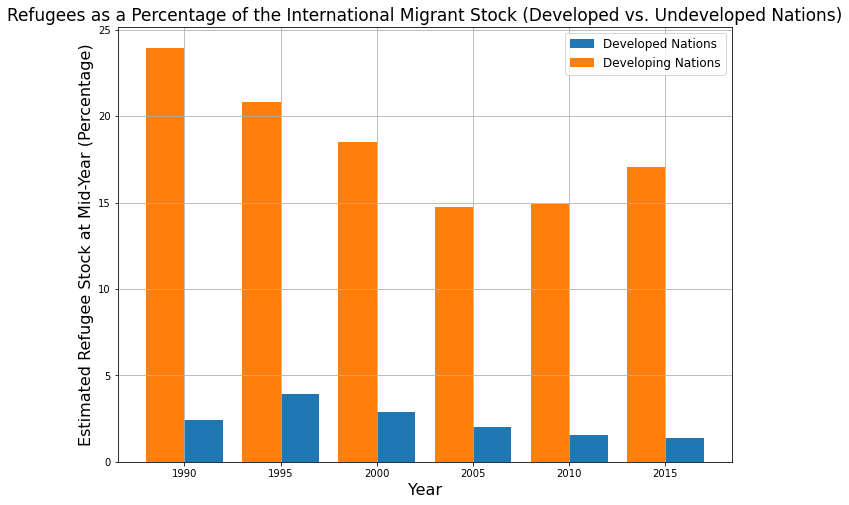

In [22]:
#create developed vs developing graph
# create a figure and axis
fig, ax = plt.subplots()

# scatter male against female
x = df_by_development['Year'][:6].astype(int)
y1 = df_by_development[df_by_development['Country Code']==901]['Refugees as a percentage of the international migrant stock'].values
y2 = df_by_development[df_by_development['Country Code']==902]['Refugees as a percentage of the international migrant stock'].values
w = 1
rects1 = ax.bar(x+w, y1, width = 2, color='tab:blue', align='center')
rects2 = ax.bar(x-w, y2,  width = 2, color='tab:orange', align='center')

fig.set_size_inches(11, 8)
#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
ax.grid(True)
ax.set_title('Refugees as a Percentage of the International Migrant Stock (Developed vs. Undeveloped Nations)',fontsize=17)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Estimated Refugee Stock at Mid-Year (Percentage)', fontsize=16)
ax.legend( (rects1[0], rects2[0]), ('Developed Nations', 'Developing Nations'), fontsize=12 )

In [16]:
#select data by continent
df_by_region =final_table_2[final_table_2['Country Code'].isin([903,935,908,909,904, 905])]

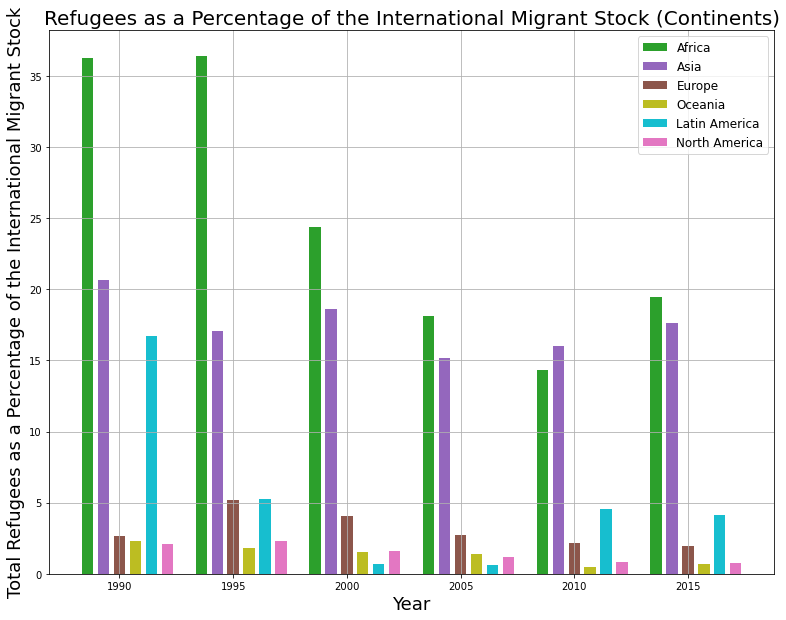

In [23]:
#make continent graph
# create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# scatter male against female
x = df_by_region['Year'][:6].astype(int)
#903,935,908,909,904, 905
y_africa = df_by_region[df_by_region['Country Code']==903]['Refugees as a percentage of the international migrant stock'].values
y_asia = df_by_region[df_by_region['Country Code']==935]['Refugees as a percentage of the international migrant stock'].values
y_europe = df_by_region[df_by_region['Country Code']==908]['Refugees as a percentage of the international migrant stock'].values
y_oceanian = df_by_region[df_by_region['Country Code']==909]['Refugees as a percentage of the international migrant stock'].values
y_latin = df_by_region[df_by_region['Country Code']==904]['Refugees as a percentage of the international migrant stock'].values
y_north_america = df_by_region[df_by_region['Country Code']==905]['Refugees as a percentage of the international migrant stock'].values
w = 0.7
rects1 = ax.bar(x-2*w, y_africa, width = 0.5, color='tab:green', align='center')
rects2 = ax.bar(x-w, y_asia,  width = 0.5, color='tab:purple', align='center')
rects3 = ax.bar(x, y_europe, width = 0.5, color='tab:brown', align='center')
rects4 = ax.bar(x+1*w, y_oceanian,  width = 0.5, color='tab:olive', align='center')
rects5 = ax.bar(x+2*w, y_latin, width = 0.5, color='tab:cyan', align='center')
rects6 = ax.bar(x+3*w, y_north_america,  width = 0.5, color='tab:pink', align='center')

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
ax.grid(True)
fig.set_size_inches(13, 10)
ax.set_title('Refugees as a Percentage of the International Migrant Stock (Continents)', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total Refugees as a Percentage of the International Migrant Stock',fontsize=18)
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]), 
          ('Africa', 'Asia','Europe','Oceania', 'Latin America', 'North America'), fontsize=12 )